In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import holidays
import plotly.express as px
from datetime import datetime, date
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////

**Transformación inicial de los datos**

In [ ]:
# DATOS BASE
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Curso AnNe /Bases de datos/EJERCICIO 1.xlsx")

In [ ]:
len(datos)

In [ ]:
datos

In [ ]:
# ==============================================================================
# Ejecutar 1 vez
# Renombar la columna de cantidad de almuerzos

datos.rename(columns={"DNI":"CANTIDAD"}, inplace=True)
datos.rename(columns={"TIPO \nALIMENTACION":"TIPO"}, inplace=True)
datos = datos.loc[datos['TIPO'] == 'Almuerzo']
## Agrupar las cantidades de almuerzos según el día
datos1 = datos.groupby("FECHA")["CANTIDAD"].nunique().reset_index()

# >>> datos1 como el dataframe con la cantidad de almuerzos por cada fecha a nivel de SEDE
# ==============================================================================

In [ ]:
datos1["CANTIDAD"].sum()

In [ ]:
datos

In [ ]:
# ==============================================================================
# Cantidades de almuerzos por restaurante por cada fecha:

datos_almuerzos = datos.loc[datos['TIPO'] == 'Almuerzo']
almuerzos_por_restaurante_fecha = datos_almuerzos.groupby(['RESTAURANTE', 'FECHA'])['CANTIDAD'].nunique().reset_index()

# Lista de restaurantes:
restaurantes = almuerzos_por_restaurante_fecha["RESTAURANTE"].unique()
restaurantes = ["CAMPAMENTO", "CAMPANARIO", "CLINICAS", "FLOR DE LOTO", "LIBRERIA",
                "MARIPOSARIO", "MIRADOR", "PALMERAS", "PARQUE INFANTIL",
                "PARQUE LUNA", "PLAYA ROJA", "VENTANAS"]

datos_restaurante = {}
almuerzos_por_fecha = {}
dataframes_fusionar = [datos1]

for restaurante in restaurantes:
    datos_restaurante[restaurante] = datos[datos['RESTAURANTE'] == restaurante]
    almuerzos_por_fecha[restaurante] = datos_restaurante[restaurante].groupby("FECHA")["CANTIDAD"].nunique().reset_index()
    almuerzos_por_fecha[restaurante].rename(columns={"CANTIDAD": restaurante}, inplace=True)
    df_restaurante = almuerzos_por_fecha[restaurante]
    df_fusionado = pd.merge(dataframes_fusionar[-1], df_restaurante, on="FECHA", how="outer").fillna(0)
    dataframes_fusionar.append(df_fusionado)

# ==============================================================================
# Base de datos casi final:
datos_fusionados = dataframes_fusionar[-1]
# ==============================================================================

In [ ]:
datos_fusionados

In [ ]:
len(datos_fusionados)

In [ ]:
# ==============================================================================

# Descargar csv de cantidad de almuerzos restaurante por día SIN FECHAS CORREGIDAS:

# >>>Esto para corregir los datos desde excel<<<
almuerzos_xlsx = pd.DataFrame(datos_fusionados)
almuerzos_xlsx.to_excel('Datos de almuerzos por restaurante por día sin corregir.xlsx', index=True)

# ==============================================================================

In [ ]:
datos_fusionados.tail(20)

//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////

In [ ]:
# ==============================================================================

# CARGAR LOS DATOS ANTERIORES CON FECHAS CORREGIDAS:

datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Curso AnNe /Bases de datos/Datos de almuerzos por restaurante por día FECHAS CORREGIDAS.xlsx")

# ==============================================================================

In [ ]:
# ==============================================================================
# Configurando los datos (EJECUTAR 1 SOLA VEZ):
# ==============================================================================

dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Crear un nuevo dataframe con las columnas de los días de la semana
datos_dias_semana = pd.DataFrame(columns=dias_semana)

# Concatenar el nuevo dataframe con el dataframe existente
datos = pd.concat([datos, datos_dias_semana], axis=1)

# Creas las columnas para cada día de la semana y las inicializas con el valor False
for dia in dias_semana:
    datos[dia] = False

# Utilizas un bucle para iterar sobre los días de la semana y asignar el valor correspondiente
for dia in range(7):
    nombre_dia = dias_semana[dia]
    datos.loc[datos["FECHA"].apply(lambda x: x.weekday()) == dia, nombre_dia] = True

# ==============================================================================

# Ejecutar 1 vez la conversión de las fechas como índice:

datos["FECHA"]=pd.to_datetime(datos["FECHA"])
datos.index=pd.to_datetime(datos.index)
datos.set_index("FECHA", inplace=True)

# ==============================================================================

# Corregiendo los valores de cada columna

columnas_datos = ['CANTIDAD', 'CAMPAMENTO', 'CAMPANARIO', 'CLINICAS', 'FLOR DE LOTO',
       'LIBRERIA', 'MARIPOSARIO', 'MIRADOR', 'PALMERAS', 'PARQUE INFANTIL',
       'PARQUE LUNA', 'PLAYA ROJA', 'VENTANAS']

for i in columnas_datos:
  datos[i] = pd.to_numeric(datos[i], downcast="integer")

# ==============================================================================

# Asignación de días festivos:

# Obtener los días festivos en Colombia:
years=[2021,2022,2023]
co_holidays = holidays.Colombia(years=years)

# Crear una columna 'EsFestivo' y asignar True si la fecha es un día festivo en Colombia, False de lo contrario
datos["FESTIVO"] = [str(fecha.date()) in co_holidays for fecha in datos.index]

# ==============================================================================

# Añadir el nombre de los días en una columna:

# Obtener el nombre de los días de la semana:
datos['DIA'] = datos.index.strftime('%A')

# Obtener como valores:
datos['DIA'] = datos.index.day_of_week + 1

# ==============================================================================

# Asignación de frecuencia y corrección de valores nulos:

datos=datos.asfreq("D")
datos=datos.fillna(0)

# ==============================================================================

# Renombrar columna cantidad:

datos.rename(columns={'CANTIDAD':"SEDE"}, inplace=True)

# ==============================================================================

//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////

In [ ]:
# ==============================================================================
# DESCARGAR EXCEL DE DATOS FINAL:
almuerzos_excel = pd.DataFrame(datos)
almuerzos_excel.to_excel('DATOS FINALES.xlsx', index=True)
# ==============================================================================

//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////

**Cargar los datos para la elaboración del modelo y el análisis:**

In [ ]:
# Fuente del recurso: origen presupuestario
# Area de trabajo: facultad del estudiante

In [ ]:
# DATOS FINALES: ALMUERZOS, RESTAURANTES, FECHAS CORREGIDAS Y DÍAS DE LA SEMANA - CON OUTLIERS
# datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Curso AnNe /Bases de datos/DATOS FINALES.xlsx")
#
# datos.rename(columns = {"CANTIDAD":"SEDE"}, inplace=True)

In [ ]:
# ==============================================================================

# DATOS FINALES SIN OUTLIERS: ALMUERZOS, RESTAURANTES, FECHAS CORREGIDAS Y DÍAS DE LA SEMANA
# Valores atípicos reemplazados por promedio de los valores de los 3 días de la semana anteriores al valor atípico en excel

datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Curso AnNe /Bases de datos/DATOS FINALES SIN OUTLIERS.xlsx")

# Corregiendo los valores de estos datos de nuevo

datos.rename(columns = {"CANTIDAD":"SEDE"}, inplace=True)

columnas_datos = ['SEDE', 'CAMPAMENTO', 'CAMPANARIO', 'CLINICAS', 'FLOR DE LOTO',
       'LIBRERIA', 'MARIPOSARIO', 'MIRADOR', 'PALMERAS', 'PARQUE INFANTIL',
       'PARQUE LUNA', 'PLAYA ROJA', 'VENTANAS']

for i in columnas_datos:
  datos[i] = pd.to_numeric(datos[i], downcast="integer")

datos["FECHA"]=pd.to_datetime(datos["FECHA"])

datos.index=pd.to_datetime(datos.index)

datos.set_index("FECHA", inplace=True)

datos=datos.asfreq("D")
datos=datos.fillna(0)

# ==============================================================================

//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////


**Seleccionar los valores por restaurante o sede (para visualización de los datos):**

In [ ]:
restaurantes = ['SEDE', 'CAMPAMENTO', 'CAMPANARIO', 'CLINICAS', 'FLOR DE LOTO',
       'LIBRERIA', 'MARIPOSARIO', 'MIRADOR', 'PALMERAS', 'PARQUE INFANTIL',
       'PARQUE LUNA', 'PLAYA ROJA', 'VENTANAS']

In [ ]:
rest_seleccionado = "SEDE"

//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////


In [ ]:
# Gráfico boxplot para estacionalidad semanal interactivo
# ==============================================================================
datos['DIA'] = datos.index.dayofweek + 1

# Calcular la mediana por día de la semana
medianas = datos.groupby('DIA')[rest_seleccionado].median().reset_index()
promedios = datos.groupby('DIA')[rest_seleccionado].mean().reset_index()
# Crear gráfico interactivo con Plotly
fig = px.box(datos, x='DIA', y=rest_seleccionado, title='Distribución cantidad por día de la semana')
fig.add_trace(px.scatter(medianas, x='DIA', y=rest_seleccionado).data[0])
fig.add_trace(px.scatter(promedios, x='DIA', y=rest_seleccionado).data[0])
fig.update_layout(yaxis_title=rest_seleccionado, width=1200, height=600)
fig.show()

In [ ]:
# Gráfico autocorrelación
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(datos.SEDE, ax=ax, lags=28)

#plt.savefig('Gráfico de autocorrelación.png', dpi=1000)

plt.show()

In [ ]:
# Gráfico interactivo de la cantidad de almuerzos por día (del restaurante seleccionado):

fig = go.Figure()
fig.add_trace(go.Scatter(x=datos.index, y=datos[rest_seleccionado], name="Cantidad almuerzos"))
fig.update_layout(
    title="Almuerzos por día",
    xaxis_title="Fechas",
    yaxis_title=rest_seleccionado,
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(size=12),
    )
)
fig.show()

In [ ]:
cantidadesreales = {}

for restaurante in restaurantes:
    cantidadesreales[restaurante] = datos[restaurante].sum()

(pd.DataFrame(cantidadesreales, index=["Cantidades reales"])).round(0)

//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////

**Recursos para el modelo:**

In [ ]:
# ===================================================================================================
# Modelo Machine learning
# ===================================================================================================

In [ ]:
# Instalar una vez:

!pip install statsmodels
!pip install scikit-fmm
!pip install scikit-learn
!pip install lightgbm

In [ ]:
# Se requieren instalar cada vez que se abra el archivo

!pip install skforecast
!pip install sktime

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('seaborn-v0_8-darkgrid')

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.datasets import load_airline
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.datasets import load_airline
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

**Gestionando el conjunto de entrenamiento, validación y prueba:**
>>>El proceso de validación no es posible dada la escasez de los datos

In [ ]:
fecha_minima = datos.index.min()
fecha_maxima = datos.index.max()
print(fecha_minima)
print(fecha_maxima)

2022-02-28 00:00:00
2022-06-27 00:00:00


In [ ]:
# Separación de datos para entrenamiento, validación y prueba
# ==============================================================================
datos = datos.loc['2022-02-28': '2022-06-27'].copy()
fin_train = '2022-05-23'
fin_test = '2022-06-27'
fin_validacion = '2022-05-23'
datos_train = datos.loc[: fin_train, :].copy()
datos_val   = datos.loc[fin_train:fin_validacion, :].copy()
datos_test  = datos.loc[fin_validacion:, :].copy()

print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas validacion : {datos_val.index.min()} --- {datos_val.index.max()}  (n={len(datos_val)})")
print(f"Fechas test       : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

Fechas train      : 2022-02-28 00:00:00 --- 2022-05-23 00:00:00  (n=85)
Fechas validacion : 2022-05-23 00:00:00 --- 2022-05-23 00:00:00  (n=1)
Fechas test       : 2022-05-23 00:00:00 --- 2022-06-27 00:00:00  (n=36)


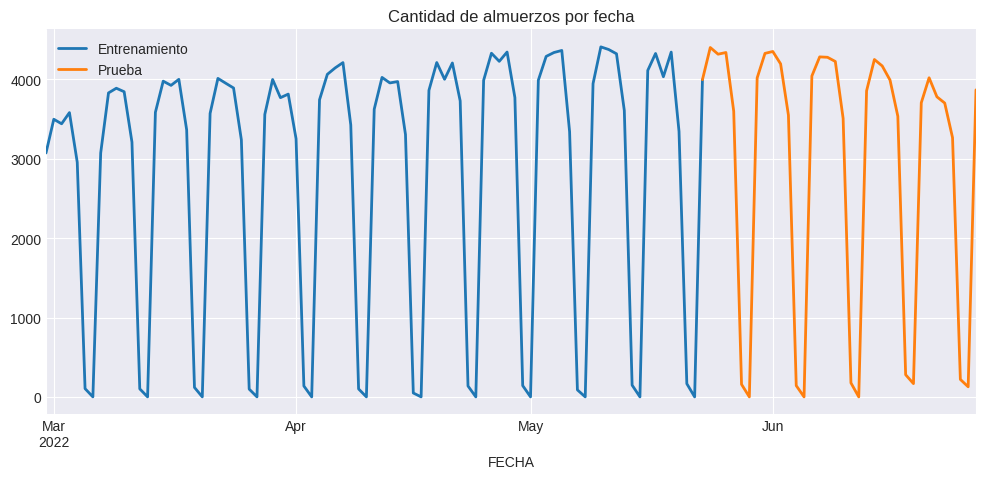

In [ ]:
# Gráfico de serie temporal de los conjuntos de datos anteriores
# ==============================================================================
palabra = rest_seleccionado
p_restaurante = palabra.replace('"', '')
fig, ax = plt.subplots(figsize=(12, 5))
datos_train.SEDE.plot(ax=ax, label='Entrenamiento', linewidth=2)
#datos_val.SEDE.plot(ax=ax, label='validación', linewidth=1)
datos_test.SEDE.plot(ax=ax, label='Prueba', linewidth=2)
ax.set_title('Cantidad de almuerzos por fecha')
ax.legend(loc="upper left");

#plt.savefig('Entrenamiento y prueba.png', dpi=1000, bbox_inches='tight')

//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////

**Creando el modelo:**

In [ ]:
# Modelo forecaster para cada restaurante:
# Lista de restaurantes:
restaurantes = ['SEDE', 'CAMPAMENTO', 'CAMPANARIO', 'CLINICAS', 'FLOR DE LOTO',
       'LIBRERIA', 'MARIPOSARIO', 'MIRADOR', 'PALMERAS', 'PARQUE INFANTIL',
       'PARQUE LUNA', 'PLAYA ROJA', 'VENTANAS']

forecasters = {}  # Diccionario para almacenar los forecasters por restaurante

for restaurante in restaurantes:
    forecaster_restaurante = ForecasterAutoreg(
                                 regressor     =  XGBRegressor(),
                                 lags          = [28,35,7],
                                 transformer_y = StandardScaler()
                             )

    forecaster_restaurante.fit(y=datos.loc[:fin_validacion, restaurante])

    forecasters[restaurante] = forecaster_restaurante

In [ ]:
# Backtest para cada restaurante
# ==============================================================================
resultados = {}  # Diccionario para almacenar los resultados por restaurante

for restaurante in restaurantes:
    metrica, predicciones = backtesting_forecaster(
                                forecaster         = forecasters[restaurante],
                                y                  = datos[restaurante],
                                steps              = 7,
                                metric             = 'mean_absolute_error',
                                initial_train_size = len(datos.loc[:fin_validacion, restaurante]),
                                refit              = False,
                                verbose            = False,
                                show_progress      = True
                            )
    resultados[restaurante] = {'metrica': metrica, 'predicciones': predicciones}

**Elegir restaurante:**

In [ ]:
rest_seleccionado = "SEDE"

# Elegir las predicciones para el restaurante seleccionado:
predicciones = resultados[rest_seleccionado]["predicciones"]
metrica = resultados[rest_seleccionado]["metrica"]

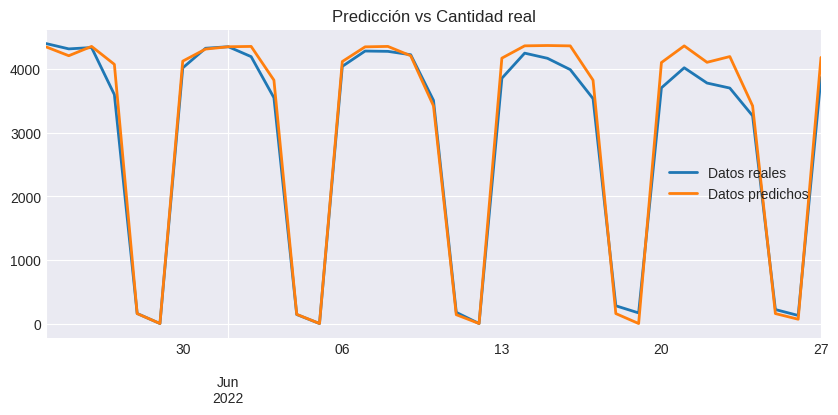

In [ ]:
# Gráfico del modelo por restaurante del conjunto de los datos de prueba
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 4))
datos.loc[predicciones.index, rest_seleccionado].plot(ax=ax, linewidth=2, label='Datos reales')
prediccionesplot = predicciones.rename(columns={"pred":"Datos predichos"}, inplace=False)
prediccionesplot.plot(ax=ax, linewidth=2, label="Datos predichos")
ax.set_title('Predicción vs Cantidad real')
ax.legend();

#plt.savefig('Predicción versus cantidad real.png', dpi=1000, bbox_inches='tight')

In [ ]:
# Error backtest individual
# ==============================================================================
print(f'Error backtest: {round(metrica,0)}')

# ==============================================================================
# Error backtest porcentual individual:
datosreales = datos.loc[predicciones.index, rest_seleccionado]
datospredichos = predicciones
mae_porcentual = (metrica / np.mean(datosreales)) * 100

print(f"Error backtest porcentual: {round(mae_porcentual,2)}" + "%")

Error backtest: 152.0
Error backtest porcentual: 5.27%


In [ ]:
# Error backtest absoluto y porcentual para cada restaurante:
# ==============================================================================
erroresabsolutos = {}
erroresporcentuales = {}
datosreales = {}

for restaurante in restaurantes:
    erroresabsolutos[restaurante] = round((resultados[restaurante]["metrica"]), 0)
    datosreales[restaurante] = datos.loc[predicciones.index, restaurante]
    erroresporcentuales[restaurante] =  round(((resultados[restaurante]["metrica"] / np.mean(datosreales[restaurante])) * 100), 2)

# Ver errores porcentuales por restaurantes:
pd.DataFrame(erroresporcentuales, index=["Error relativo"])

,SEDE,CAMPAMENTO,CAMPANARIO,CLINICAS,FLOR DE LOTO,LIBRERIA,MARIPOSARIO,MIRADOR,PALMERAS,PARQUE INFANTIL,PARQUE LUNA,PLAYA ROJA,VENTANAS
Error relativo,5.27,8.45,2.87,7.99,32.95,100.0,9.0,5.05,5.93,14.37,5.71,10.01,7.39


In [ ]:
# Ver errores absolutos por restaurantes:
pd.DataFrame(erroresabsolutos, index=["Error absoluto"])

,SEDE,CAMPAMENTO,CAMPANARIO,CLINICAS,FLOR DE LOTO,LIBRERIA,MARIPOSARIO,MIRADOR,PALMERAS,PARQUE INFANTIL,PARQUE LUNA,PLAYA ROJA,VENTANAS
Error absoluto,152.0,15.0,3.0,45.0,7.0,21.0,16.0,11.0,40.0,18.0,17.0,22.0,23.0


In [ ]:
# Importancia predictores
# ==============================================================================
forecasters[rest_seleccionado].get_feature_importance().sort_values("importance", ascending=False)

,feature,importance
0,lag_28,0.969618
1,lag_35,0.025320
2,lag_7,0.005063


//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////

**Modelo en tiempo real**

In [ ]:
# ==============================================================================

# Lista de restaurantes:
restaurantes = ['SEDE', 'CAMPAMENTO', 'CAMPANARIO', 'CLINICAS', 'FLOR DE LOTO',
       'LIBRERIA', 'MARIPOSARIO', 'MIRADOR', 'PALMERAS', 'PARQUE INFANTIL',
       'PARQUE LUNA', 'PLAYA ROJA', 'VENTANAS']

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Seleccionar restaurante:     # <<<<<<<<
rest_seleccionado = "SEDE"     # <<<<<<<<
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# ==============================================================================

In [ ]:
# Predicciones para cada uno de los restaurantes en un momento cualquiera:
# ==============================================================================
predicciones = {}

for restaurante in restaurantes:
    rangomodelo = datos.loc["2022-02-28":"2022-06-25", restaurante]
    predicciones_restaurante = forecasters[restaurante].predict(steps=120, last_window=rangomodelo)
    predicciones_restaurante = pd.DataFrame(predicciones_restaurante)
    predicciones_restaurante.index = pd.to_datetime(predicciones_restaurante.index)
    predicciones[restaurante] = predicciones_restaurante

In [ ]:
# Gráfico predicción en tiempo real interactivo del restaurante seleccionado
fig = go.Figure()

fig.add_trace(go.Scatter(x=predicciones[rest_seleccionado].index, y=predicciones[rest_seleccionado]["pred"], name='test'))

fig.update_layout(title='Predicción ' + rest_seleccionado,
                  xaxis_title='Fecha',
                  yaxis_title='Cantidad')

fig.show()

//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////

>>>Con el siguiente código movemos los datos predichos hacía el semestre 2023-2 y luego reemplazamos las estimaciones de los días festivos y domingos por cero para obtener una estimación más acertada. Esto teniendo en cuenta el supuesto de que nada extraño sucederá durante el semestre

>>>TAMPOCO SE ESTÁ TENIENDO EN CUENTA LA SEMANA DE RECESO

In [ ]:
# ==============================================================================
# Obteniendo las estimaciones finales:
# ==============================================================================

# Definir la fecha de inicio específica a la que se desea ajustar las fechas

fecha_inicio = datetime(2023, 8, 6)
#fecha_inicio = datetime(2022, 8, 7)

# Obtener los días festivos en Colombia:
years=[2021,2022,2023,2024]
co_holidays = holidays.Colombia(years=years)

for restaurante in restaurantes:

    # Desplazar las fechas al inicio del semestre

    # Calcular el desplazamiento entre la fecha de inicio específica y la primera fecha del DataFrame:
    desplazamiento = predicciones[restaurante].index[0] - fecha_inicio
    # Aplicar el desplazamiento a las fechas de inicio
    predicciones[restaurante].index = predicciones[restaurante].index - desplazamiento

    # Asignar los días festivos:

    predicciones[restaurante]["FESTIVO"] = [str(fecha.date()) in co_holidays for fecha in predicciones[restaurante].index]

    # Añadir el nombre de los días

    # Obtener el nombre de los días de la semana:
    predicciones[restaurante]['DIA'] = predicciones[restaurante].index.strftime('%A')
    # Obtener como valores:
    predicciones[restaurante]['DIA'] = predicciones[restaurante].index.day_of_week + 1

    # Reemplazar los valores de días especiales por 0

    # Reemplazar los valores por 0 cuando es festivo:
    predicciones[restaurante].loc[predicciones[restaurante]['FESTIVO'], 'pred'] = 0
    # Reemplazar los valores por 0 cuando es domingo:
    predicciones[restaurante].loc[predicciones[restaurante]['DIA'] == 7, 'pred'] = 0

# ==============================================================================

**Estimación final:**

In [ ]:
# ==============================================================================

# Cantidades finales de almuerzos según el restaurante seleccionado:

print(predicciones[rest_seleccionado]["pred"].sum())

# ==============================================================================

342460.7186171997


In [ ]:
# ==============================================================================

# Cantidades finales de almuerzos sumando las cantidades predichas por restaurante:

cantidades_por_restaurante = {}

for restaurante in restaurantes:
    cantidades_individuales = predicciones[restaurante]["pred"].sum()
    cantidades_por_restaurante[restaurante] = cantidades_individuales

# Excluir la cantidad total de sede para la sumatoria de las cantidades:

suma_total = sum(cantidades_por_restaurante[restaurante] for restaurante in cantidades_por_restaurante if restaurante != "SEDE")

# ==============================================================================

In [ ]:
# ==============================================================================
# Cantidades finales de almuerzos si se sumara de manera individual por restaurante:

print(suma_total)

# ==============================================================================

324127.1356605061


In [ ]:
# ==============================================================================

# Datos con las cantidades finales totales por restaurante y sede:

(pd.DataFrame(cantidades_por_restaurante, index=["Cantidades estimadas"])).round(0)

# ==============================================================================

,SEDE,CAMPAMENTO,CAMPANARIO,CLINICAS,FLOR DE LOTO,LIBRERIA,MARIPOSARIO,MIRADOR,PALMERAS,PARQUE INFANTIL,PARQUE LUNA,PLAYA ROJA,VENTANAS
Cantidades estimadas,342461.0,21263.0,9782.0,63495.0,1666.0,0.0,22032.0,24098.0,73910.0,13414.0,32502.0,25584.0,36382.0


In [ ]:
# Gráfico predicción en tiempo real interactivo, sin valores de festivos ni domignos del restaurante seleccionado
fig = go.Figure()

fig.add_trace(go.Scatter(x=predicciones[rest_seleccionado].index, y=predicciones[rest_seleccionado]["pred"], name='test'))

fig.update_layout(title='Predicción ' + rest_seleccionado,
                  xaxis_title='Fecha',
                  yaxis_title='Cantidad')

fig.show()

**Base de datos finales con la cantidad de almuerzos estimados para el semestre seleccionado:**

In [ ]:
# ==============================================================================

# Renombrando las columnas para cada restaurante:

for restaurante in restaurantes:
    predicciones[restaurante].rename(columns={'pred': restaurante}, inplace=True)

# Elaboración de la base de datos:

dataframes = []

for restaurante in restaurantes:
    dataframes.append(predicciones[restaurante])

# Concatenar los DataFrames en uno solo
datos_finales = pd.concat(dataframes, axis=1)

# Eliminar columnas dias
datos_finales = datos_finales.drop(['FESTIVO', 'DIA'], axis=1)

# Asignación de días festivos:

# Obtener los días festivos en Colombia:
years=[2021,2022,2023]
co_holidays = holidays.Colombia(years=years)

# Crear una columna 'EsFestivo' y asignar True si la fecha es un día festivo en Colombia, False de lo contrario
datos_finales["FESTIVO"] = [str(fecha.date()) in co_holidays for fecha in datos_finales.index]


# Añadir el nombre de los días en una columna:

# Obtener el nombre de los días de la semana:
datos_finales['DIA'] = datos_finales.index.strftime('%A')

# Obtener como valores:
datos_finales['DIA'] = datos_finales.index.day_of_week + 1

datos_finales = datos_finales.round(0)

# ==============================================================================

//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////

**Resultado final**

---



In [ ]:
# ==============================================================================
# Descargar archivo excel con los valores estimados del semestre:
datos_finales.to_excel('Cantidades estimadas del segundo semestre de 2023.xlsx', index=True)
# ==============================================================================

In [ ]:
datos_finales

**Notas:**

1. La semana de receso se está tomando como una semana normal

2. Se tienen en cuenta festivos y domingos para la estimación

3. Las estimaciones se pueden ver afectadas por el impacto de las cantidades REALES que hayan en el siguiente semestre del restaurante LIBRERIA (notar que en el archivo este fue el único restaurante que no se debe tener en cuenta)

4. **Por lo tanto, las estimaciones más confiables siguien siendo las de nivel de sede, a no ser que haya una mejor proporción de datos para LIBRERIA**

//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////
//////////////////////////

>El modelo de machine learning se elaboró en base a un proyecto de forecasting para la serie temporal de la demanda eléctrica (MW) del estado de Victoria (Australia)

**Referencia:**

Predicción (forecasting) de la demanda eléctrica con Python by Joaquín Amat Rodrigo and Javier Escobar Ortiz, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py29-forecasting-demanda-energia-electrica-python.html